In [1]:
from hermes_client import HermesClient, ForecastSeriesClient
import pandas as pd
import numpy as np
from datetime import datetime

## Overview of pages to display
### Home page 
- SED + ETH logo
- disclaimer "this is an experimental tool, not used for decision support...."
### Models (md)
- brief explanation of the models (EM1, ML1, HM1D-CAPS)
- strengths and limitations of each model
### Forecast rates 
- fig type 1 for each forecasting horizon
- default is cumulative rates
- toggle needed to see the non-cumulative rates
### Forecast FMD
- fig type 2 for each forecasting horizon
### Data (optional only if we have time)
- hydraulics 
- seismicity in time (magnitude - time plot) 
- b-value in time
- FMD observed

In [2]:
project_name = 'project_induced'
forecastseries_name = 'fs_induced'
target_forecast_start_time = datetime.fromisoformat('2022-04-21T15:00:00')
time_forecast = '2022-04-21T17:00:00'
target_borehole_section = '16A-32/section_03'
url = 'http://localhost:8000'
monthyear = 'April 2022'
starttime_stage = '2022-04-21T13:00:00'
endtime_stage = '2022-04-21T20:00:00'
mc = -1.19
cat_binning = 0.01
MAG_RED_TLS = 3.0

In [3]:
hermes_client = HermesClient(url)
all_projects = hermes_client.list_projects()
all_projects


[{'oid': 'c9d163c4-02ea-4d4d-9ef5-26e82c025c92',
  'name': 'project_induced',
  'starttime': '2022-04-21T00:00:00',
  'endtime': '2022-04-21T23:59:59',
  'description': 'This is a test project',
  'creationinfo': {'creationtime': '2025-05-22T16:51:41'}}]

In [4]:
# Get the project
project_info = hermes_client.get_project_by_name(project_name)
project_info

{'oid': 'c9d163c4-02ea-4d4d-9ef5-26e82c025c92',
 'name': 'project_induced',
 'starttime': '2022-04-21T00:00:00',
 'endtime': '2022-04-21T23:59:59',
 'description': 'This is a test project',
 'creationinfo': {'creationtime': '2025-05-22T16:51:41'}}

In [5]:
# Get the forecast series oid by name
forecastseries_info = hermes_client.get_forecastseries_by_name(project_name, forecastseries_name)
forecastseries_info

{'oid': 'd3dbad61-ab57-428d-ba60-ba30fb485fd8',
 'project_oid': 'c9d163c4-02ea-4d4d-9ef5-26e82c025c92',
 'name': 'fs_induced',
 'description': 'This is a test forecast series',
 'status': 'PENDING',
 'observation_starttime': '2022-04-21T13:00:00',
 'bounding_polygon': 'POLYGON ((-125 35, -115 35, -115 40, -125 40, -125 35))',
 'depth_min': 0.0,
 'depth_max': 10.0,
 'model_settings': {'well_section_id': '37801a57-90b9-4fb5-83d7-506ee9166acf',
  'injection_point': [8.47449792444771, 46.5098187019071, 1271.43402303251],
  'local_proj_string': 'epsg:2056',
  'epoch_duration': 600,
  'n_phases': 8},
 'tags': ['test'],
 'seismicityobservation_required': 'REQUIRED',
 'injectionobservation_required': 'REQUIRED',
 'injectionplan_required': 'REQUIRED',
 'fdsnws_url': 'file:///home/nicolas/workspaces/hermes/examples/induced/quakeml.xml',
 'hydws_url': 'http://scforge.ethz.ch:8081/hydws/v1/boreholes/caf65646-8093-4aaf-989c-1c837f497667',
 'modelconfigs': [{'oid': 'dc411fce-f4a1-43b5-b28f-356330b70

In [6]:
fs_client = ForecastSeriesClient(url, forecastseries_name, project_name)
fs_client.metadata

ForecastSeries(
    oid=UUID('d3dbad61-ab57-428d-ba60-ba30fb485fd8'),
    project_oid=UUID('c9d163c4-02ea-4d4d-9ef5-26e82c025c92'),
    name='fs_induced',
    description='This is a test forecast series',
    status='PENDING',
    bounding_polygon=<POLYGON ((-125 35, -115 35, -115 40, -125 40, -125 35))>,
    depth_min=0.0,
    depth_max=10.0,
    tags=['test'],
    seismicityobservation_required='REQUIRED',
    injectionobservation_required='REQUIRED',
    fdsnws_url='file:///home/nicolas/workspaces/hermes/examples/induced/quakeml.xml',
    hydws_url='http://scforge.ethz.ch:8081/hydws/v1/boreholes/caf65646-8093-4aaf-989c-1c837f497667',
    creationinfo={'creationtime': '2025-05-22T16:51:48'},
    injectionplans=['constant', 'double'],
    modelconfigs=['em1', 'em1_2']
)

In [7]:
# List all forecasts in the forecast series
fs_client.forecasts

[Forecast(COMPLETED, 2022-04-21 15:00:00, 2022-04-21 18:00:00),
 Forecast(COMPLETED, 2022-04-21 16:00:00, 2022-04-21 18:00:00),
 Forecast(COMPLETED, 2022-04-21 17:00:00, 2022-04-21 18:00:00)]

In [8]:
# Get the forecast of the series by start time
forecast = fs_client.get_forecast_by_time(target_forecast_start_time)
forecast._metadata

{'oid': '5035f855-7abc-4e5f-8462-174da91b9ff6',
 'status': 'COMPLETED',
 'starttime': '2022-04-21T15:00:00',
 'endtime': '2022-04-21T18:00:00',
 'seismicityobservation': {'oid': '78118934-0865-46c5-8c61-7e00be2a9d6b'},
 'injectionobservation': {'oid': '4e374bd1-2f2c-4692-82a9-42b3257ddd37'},
 'modelruns': [{'oid': '135a766f-734d-4260-b846-12cab7397e1c',
   'modelconfig': {'oid': 'dc411fce-f4a1-43b5-b28f-356330b7078d',
    'name': 'em1',
    'result_type': 'GRID'},
   'injectionplan': {'oid': 'c6840a49-b833-4046-88bd-306369e28eb1',
    'name': 'double'},
   'status': 'COMPLETED'},
  {'oid': '50d8f1a8-ebbf-42d1-877f-f68c8a18bba5',
   'modelconfig': {'oid': 'dc411fce-f4a1-43b5-b28f-356330b7078d',
    'name': 'em1',
    'result_type': 'GRID'},
   'injectionplan': {'oid': 'c19255d7-9357-4326-aa16-c742e1cd778e',
    'name': 'constant'},
   'status': 'COMPLETED'},
  {'oid': '76245b93-a206-4bad-a0bd-08a4739a354e',
   'modelconfig': {'oid': '795acc09-1e60-4a22-bf5e-710e7deec970',
    'name': 'e

In [11]:
forecast.metadata

ForecastInfo(
    oid=UUID('5035f855-7abc-4e5f-8462-174da91b9ff6'),
    status='COMPLETED',
    starttime=datetime.datetime(2022, 4, 21, 15, 0),
    endtime=datetime.datetime(2022, 4, 21, 18, 0),
    creationinfo={'creationtime': '2025-05-22T16:52:22'},
    injectionplans=['constant', 'double'],
    modelconfigs=['em1', 'em1_2']
)

In [12]:
# rates_em1_constant = forecast.get_results('em1', 'constant')
forecast.modelruns[0].metadata

ModelRunInfo(
    oid=UUID('135a766f-734d-4260-b846-12cab7397e1c'),
    injectionplan='double',
    modelconfig='em1',
    status='COMPLETED',
    result_type='GRID'
)

In [10]:
# Extract the rate values for the different models (e.g., EM1, HM1D, ML1)
rates_em1 = [rate['rateforecasts'] for rate in rates if str.lower(rate['modelconfig_name']) == 'em1'][0]
rates_hm1d = [rate['rateforecasts'] for rate in rates if str.lower(rate['modelconfig_name']) == 'hm1d'][0]
rates_ml1 = [rate['rateforecasts'] for rate in rates if str.lower(rate['modelconfig_name']) == 'ml1'][0]

print(f"EM1 rates: {len(rates_em1)}")
print(f"HM1D rates: {len(rates_hm1d)}")
print(f"ML1 rates: {len(rates_ml1)}")



EM1 rates: 53
HM1D rates: 53
ML1 rates: 53


# Fetch seismisity observation of the forecast


In [11]:
observed_seismicity = fs_client.get_forecast_seismicity(forecast_oid)
observed_seismicity

,event_type,time,latitude,longitude,depth,magnitude,magnitude_type,magnitude_mag
0,None,2022-04-21 13:41:21.483284,38.501838,-112.885207,871.5855,-1.50,mag,-1.5
1,None,2022-04-21 13:42:00.471574,38.501870,-112.885299,865.1847,-1.87,mag,-1.87
2,None,2022-04-21 13:43:49.453583,38.501833,-112.885162,873.4143,-1.26,mag,-1.26
3,None,2022-04-21 13:43:59.260487,38.501850,-112.885113,872.4999,-1.36,mag,-1.36
4,None,2022-04-21 13:44:09.863236,38.501855,-112.885134,872.1951,-1.38,mag,-1.38
...,...,...,...,...,...,...,...,...
321,None,2022-04-21 14:19:30.831097,38.502089,-112.884926,815.1975,-1.37,mag,-1.37
322,None,2022-04-21 14:19:33.689049,38.502083,-112.884912,812.7591,-0.74,mag,-0.74
323,None,2022-04-21 14:19:40.338779,38.502254,-112.884870,817.3311,-1.77,mag,-1.77
324,None,2022-04-21 14:19:41.227993,38.501858,-112.884949,829.8279,-1.52,mag,-1.52


# Fetch the injection observation of the forecast


In [12]:
# This assumes that there is only one injection well in the forecast (as multiple wells are not supported yet)
borehole_data = fs_client.get_forecast_injectionwells(forecast_oid)[0]

# Find the correct section of the borehole and fetch the hydrolics from there
values = [section['hydraulics'] for section in borehole_data.to_json()['sections'] if section['name'] == target_borehole_section][0]

# Convert the hydraulic data to a DataFrame directly converting the datetime to a datetime object and indexing by it
# also converting the toppressure and topflow to a float after extracting the values
hydraulic_dict = [{'topflow': item['topflow']['value'], 'toppressure': item['toppressure']['value'], 'datetime': item['datetime']['value']} for item in values]
hydraulic_df = pd.DataFrame(hydraulic_dict)
hydraulic_df['datetime'] = pd.to_datetime(hydraulic_df['datetime'])
hydraulic_df.set_index('datetime', inplace=True)

hydraulic_df

,topflow,toppressure
datetime,,
2022-04-21 13:00:23,0.000000,9.995330e+04
2022-04-21 13:00:23,0.000000,9.787108e+04
2022-04-21 13:00:25,0.000000,9.995330e+04
2022-04-21 13:00:26,0.000000,9.995330e+04
2022-04-21 13:00:27,0.000000,9.787108e+04
...,...,...
2022-04-21 14:19:56,0.078875,4.507651e+07
2022-04-21 14:19:56,0.078904,4.507651e+07
2022-04-21 14:19:58,0.079010,4.496613e+07




## Fetch the injection plan of the forecast

In [117]:
# As the injection plan within one forecast is always the same, we can just take an arbitrary one of a modelrun
#fs_client.injectionplans
#TODO: ask Nicolas how to access the injection plan when using the multiply thingy

# PLOTTING


In [17]:
import matplotlib.pyplot as plt

#styling
colour_injection = '#628395'
colour_stage = 'black'
colour_em1 = '#95BF8F'
colour_ml1 = '#967387'
colour_hm1d = '#E3B678'

## Forecast rates

In [14]:
def std(x): return np.std(x)

def get_rates_statistics(forecasts: list):

    forecast = pd.concat([mdl.add_time_index() for mdl in forecasts])

    forecast['a_std'] = forecast['a']
    forecast['numberevents_std'] = forecast['number_events']
    forecast['b_std'] = forecast['b']
    forecast['mc_std'] = forecast['mc']
    forecast['alpha_std'] = forecast['alpha']

    statistics = forecast.groupby(level=[0, 1]).agg(
        {'number_events': 'median',
         'b': 'median',
         'mc': 'median',
         'a': 'median',
         'alpha': 'median',
         'numberevents_std': std,
         'b_std': std,
         'mc_std': std,
         'a_std': std,
         'alpha_std': std,
         })

    statistics.reset_index(inplace=True)

    statistics.index = \
        statistics.apply(lambda x: x['starttime'] +
                         (x['endtime'] - x['starttime']) / 2, axis=1)

    statistics.drop(columns=['starttime', 'endtime'], inplace=True)

    return statistics

## Figure type 1 for forecast rates

/var/folders/hz/pxzxklnx7t3cg62bttft1pyr0000gn/T/ipykernel_29215/983050312.py:101: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


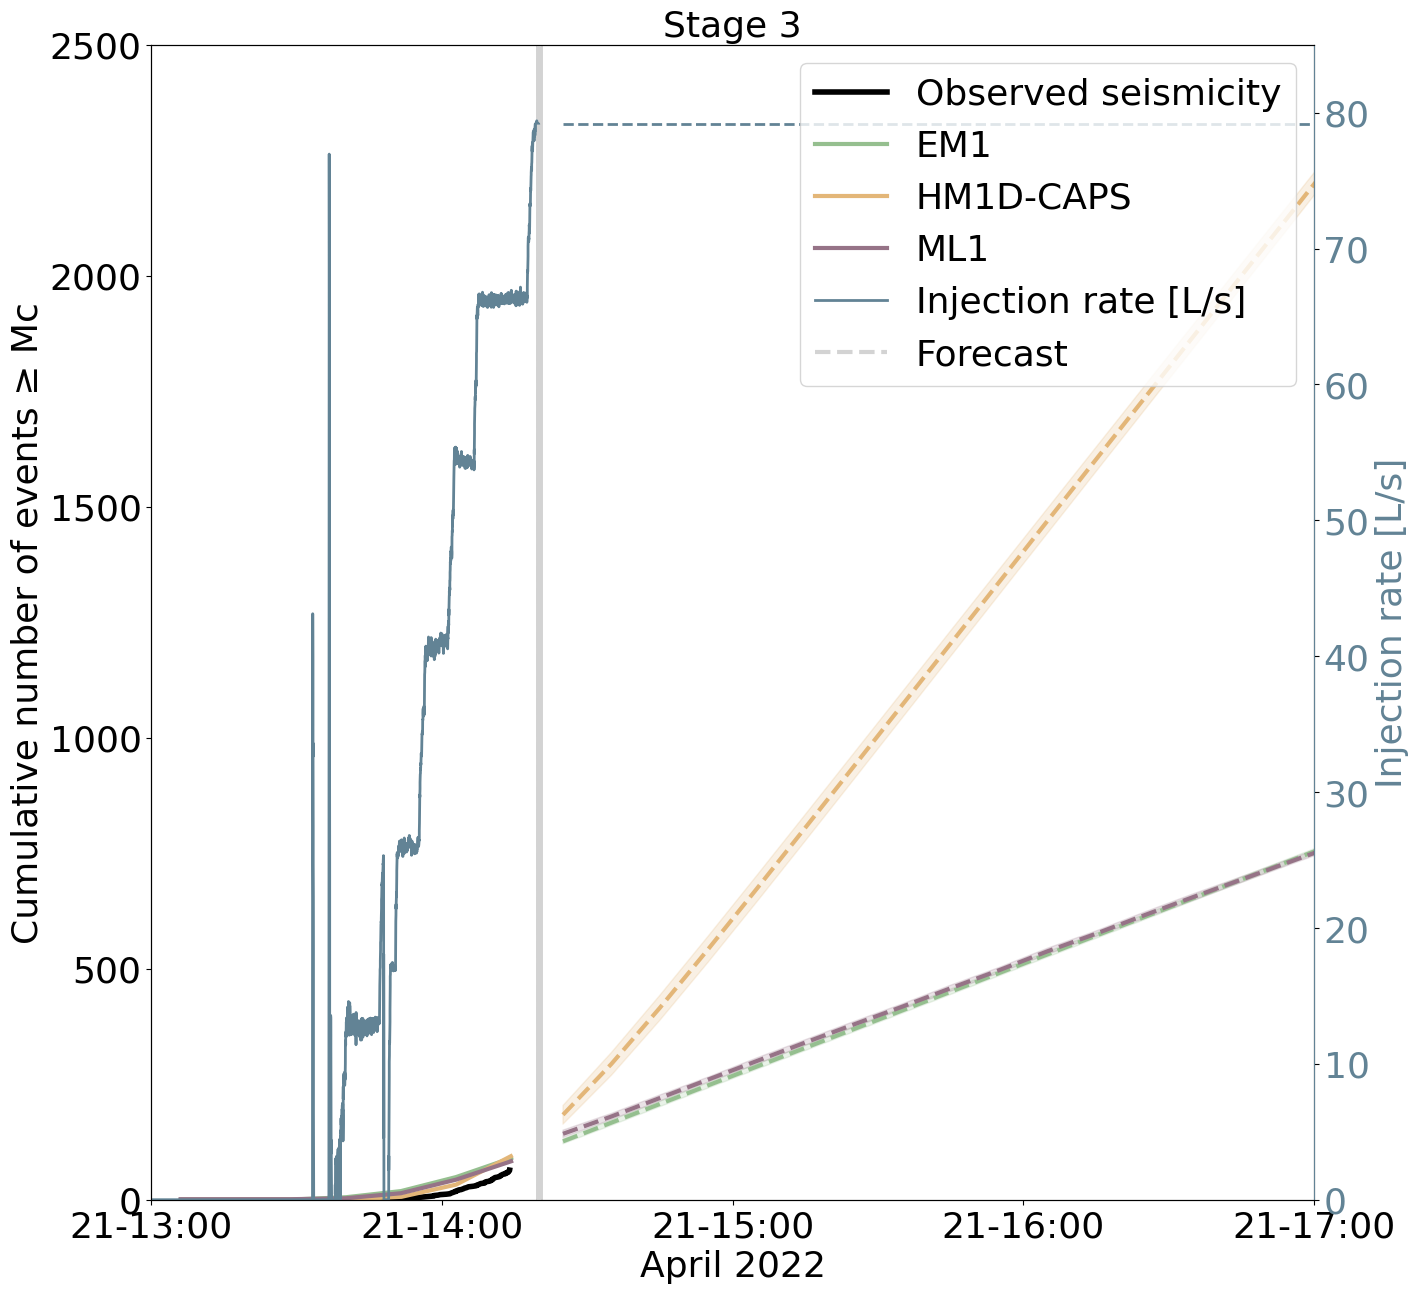

In [32]:
# figure with 2 y-axes
fig, ax1 = plt.subplots(figsize=(15, 15))
ax2 = ax1.twinx()
fontsize = 26

em1_rates = get_rates_statistics(rates_em1)
em1_rates['cumulative_number_events'] = em1_rates['number_events'].cumsum()
hm1d_rates = get_rates_statistics(rates_hm1d)
hm1d_rates['cumulative_number_events'] = hm1d_rates['number_events'].cumsum()
ml1_rates = get_rates_statistics(rates_ml1)
ml1_rates['cumulative_number_events'] = ml1_rates['number_events'].cumsum()
target_forecast_start_time_dt = pd.to_datetime(target_forecast_start_time)


# left y-axis
timesteps = em1_rates.index[em1_rates.index <= target_forecast_start_time_dt]

# count events in observed_seismisity with time before target_forecast_start_time
observed_seismisity_before = observed_seismicity[observed_seismicity['time'] < timesteps[-1]]
observed_seismicity_before_mc = observed_seismisity_before[observed_seismisity_before['magnitude'] >= mc]

ax1.plot(observed_seismicity_before_mc['time'], np.arange(1, len(observed_seismicity_before_mc) + 1), 
         color=colour_stage, linestyle='solid', linewidth=4, label='Observed seismicity')


# plot the number of events for each model before the forecast start time as a solid line
ax1.plot(em1_rates.index[em1_rates.index < target_forecast_start_time_dt], 
         em1_rates['cumulative_number_events'][em1_rates.index < target_forecast_start_time_dt], 
         color=colour_em1, linestyle='solid', linewidth=3, label='EM1')
ax1.plot(hm1d_rates.index[hm1d_rates.index < target_forecast_start_time_dt], 
         hm1d_rates['cumulative_number_events'][hm1d_rates.index < target_forecast_start_time_dt], 
         color=colour_hm1d, linestyle='solid', linewidth=3, label='HM1D-CAPS')
ax1.plot(ml1_rates.index[ml1_rates.index < target_forecast_start_time_dt], 
         ml1_rates['cumulative_number_events'][ml1_rates.index < target_forecast_start_time_dt], 
         color=colour_ml1, linestyle='solid', linewidth=3, label='ML1')
# plot the number of events for each model after the forecast start time as a dashed line
ax1.plot(em1_rates.index[em1_rates.index >= target_forecast_start_time_dt], 
         em1_rates['cumulative_number_events'][em1_rates.index >= target_forecast_start_time_dt], 
         color=colour_em1, linestyle='dashed', linewidth=3)
ax1.plot(hm1d_rates.index[hm1d_rates.index >= target_forecast_start_time_dt],
         hm1d_rates['cumulative_number_events'][hm1d_rates.index >= target_forecast_start_time_dt], 
         color=colour_hm1d, linestyle='dashed', linewidth=3)
ax1.plot(ml1_rates.index[ml1_rates.index >= target_forecast_start_time_dt], 
         ml1_rates['cumulative_number_events'][ml1_rates.index >= target_forecast_start_time_dt], 
         color=colour_ml1, linestyle='dashed', linewidth=3)
# add uncertainty bands for the number of events for each model after the forecast start time
ax1.fill_between(em1_rates.index[em1_rates.index >= target_forecast_start_time_dt], 
                 em1_rates['cumulative_number_events'][em1_rates.index >= target_forecast_start_time_dt] - em1_rates['numberevents_std'][em1_rates.index >= target_forecast_start_time_dt], 
                 em1_rates['cumulative_number_events'][em1_rates.index >= target_forecast_start_time_dt] + em1_rates['numberevents_std'][em1_rates.index >= target_forecast_start_time_dt], 
                 color=colour_em1, alpha=0.2)
ax1.fill_between(hm1d_rates.index[hm1d_rates.index >= target_forecast_start_time_dt],
                    hm1d_rates['cumulative_number_events'][hm1d_rates.index >= target_forecast_start_time_dt] - hm1d_rates['numberevents_std'][hm1d_rates.index >= target_forecast_start_time_dt],
                    hm1d_rates['cumulative_number_events'][hm1d_rates.index >= target_forecast_start_time_dt] + hm1d_rates['numberevents_std'][hm1d_rates.index >= target_forecast_start_time_dt],
                    color=colour_hm1d, alpha=0.2)
ax1.fill_between(ml1_rates.index[ml1_rates.index >= target_forecast_start_time_dt],
                    ml1_rates['cumulative_number_events'][ml1_rates.index >= target_forecast_start_time_dt] - ml1_rates['numberevents_std'][ml1_rates.index >= target_forecast_start_time_dt],
                    ml1_rates['cumulative_number_events'][ml1_rates.index >= target_forecast_start_time_dt] + ml1_rates['numberevents_std'][ml1_rates.index >= target_forecast_start_time_dt],
                    color=colour_ml1, alpha=0.2)

# plot the hydraulic data on the right y-axis
ax2.plot(hydraulic_df.index, hydraulic_df['topflow']*1000, color=colour_injection, 
         label='Injection rate [L/s]', linewidth=2)
# colour label ax2 
ax2.spines['right'].set_color(colour_injection)
ax2.yaxis.label.set_color(colour_injection)
# plot forecasted hydraulic data on the right y-axis (dashed line) using the last value of hydraulic_df for topflow and em1_rates.index >= target_forecast_start_time_dt
ax2.plot(em1_rates.index[em1_rates.index >= target_forecast_start_time_dt], 
         np.full(len(em1_rates.index[em1_rates.index >= target_forecast_start_time_dt]), 
                 hydraulic_df['topflow'].iloc[-1]*1000), 
         color=colour_injection, linestyle='dashed', linewidth=2)
ax2.tick_params(axis='y', labelcolor=colour_injection,labelsize=fontsize)
# add thick vertical grey line at the time of the forecast start
ax1.axvline(pd.to_datetime(target_forecast_start_time), color='lightgrey', linewidth=5)
# add invisible grey dashed line for the legend
ax2.axvline(pd.to_datetime(target_forecast_start_time), color='lightgrey', linestyle='dashed', linewidth=3, label='Forecast')
# change fontsize of the x-axis and y-axis labels

ax1.set_xlabel(monthyear, fontsize=fontsize)
ax1.set_ylabel('Cumulative number of events ≥ Mc', fontsize=fontsize)
ax2.set_ylabel('Injection rate [L/s]', fontsize=fontsize)
ax1.tick_params(axis='x', labelsize=fontsize)
ax1.tick_params(axis='y', labelsize=fontsize)
ax2.tick_params(axis='y', labelsize=fontsize)

 # format the x-axis ticks 
ax1.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%d-%H:%M'))
# ticks every hour
ax1.xaxis.set_major_locator(plt.matplotlib.dates.HourLocator(interval=1))
# limits for the x-axis
ax1.set_xlim([pd.to_datetime(starttime_stage), pd.to_datetime(endtime_stage)-pd.Timedelta(hours=3)])
# legend
fig.legend(loc='upper right', bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes, ncols=1, fontsize=fontsize)

# left y-axis as log
#ax1.set_yscale('log')
ax1.set_ylim([0, 2500])
ax2.set_ylim([0, 85])

# title 'Stage 3'
ax1.set_title('Stage 3', fontsize=fontsize)
fig.show()

## FMD

In [22]:
from seismostats.utils import get_fmd, get_cum_fmd
from seismostats import Catalog
from seismostats.plots import plot_fmd, plot_cum_fmd

In [23]:
def gutenberg_richter(magnitudes: np.ndarray, b_value: float,
                      mc: float, n_mc: int) -> np.ndarray:
    """ Estimates the cumulative Gutenberg richter law (proportional to the
    complementary cumulative FMD) for a given magnitude vector.

    Args:
        magnitudes: vector of magnitudes
        b_value: theoretical b_value
        mc: completeness magnitude
        n_mc: cumulative number of all events larger than the completeness
            magnitude (n_mc = 10 ** a)
    """
    return n_mc * 10 ** (-b_value * (magnitudes - mc))

In [24]:
# load catalogue fully
path_catalogue = '/Users/vanilleritz/Documents/Conferences/EGC2025/forge/APR_hermes_FORGE_paper/GES_V3.xml'
# read the catalogue with seismostats
catalogue = Catalog.from_quakeml(path_catalogue)
catalogue

,event_type,time,latitude,longitude,depth,magnitude,magnitude_type,magnitude_mag
0,None,2022-04-21 13:41:21.483284,38.501838,-112.885207,871.5855,-1.50,mag,-1.5
1,None,2022-04-21 13:42:00.471574,38.501870,-112.885299,865.1847,-1.87,mag,-1.87
2,None,2022-04-21 13:43:49.453583,38.501833,-112.885162,873.4143,-1.26,mag,-1.26
3,None,2022-04-21 13:43:59.260487,38.501850,-112.885113,872.4999,-1.36,mag,-1.36
4,None,2022-04-21 13:44:09.863236,38.501855,-112.885134,872.1951,-1.38,mag,-1.38
...,...,...,...,...,...,...,...,...
3201,None,2022-04-21 17:59:40.676319,38.501549,-112.885051,725.2815,-1.50,mag,-1.5
3202,None,2022-04-21 17:59:50.002121,38.501507,-112.885138,784.4127,-1.03,mag,-1.03
3203,None,2022-04-21 17:59:52.494606,38.502308,-112.885185,954.7959,-0.41,mag,-0.41
3204,None,2022-04-21 17:59:58.658279,38.501488,-112.885323,780.4503,-1.22,mag,-1.22


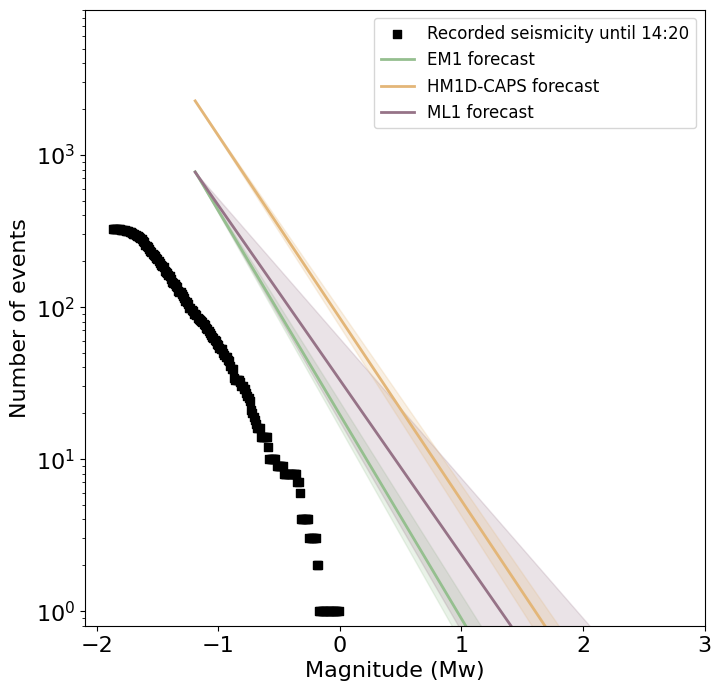

In [35]:
# subset the catalogue to the time of the forecast
starttime_stage_dt = pd.to_datetime(starttime_stage)
cat_training = catalogue[(catalogue.time >= starttime_stage_dt) & (catalogue.time <= target_forecast_start_time_dt)]

# find index of the em1_rates dataframe with time closest to time_forecast_dt
time_forecast_dt = pd.to_datetime(time_forecast) 
model_forecast_time = em1_rates.index[em1_rates.index >= time_forecast_dt][0]
cat_forecast = catalogue[(catalogue.time > starttime_stage_dt) & (catalogue.time <= model_forecast_time)]
# plot the cumulative fmd of the catalogue


ax = plt.subplots(figsize=(8, 8))[1]

plot_cum_fmd(cat_training.magnitude, delta_m=0.01, ax=ax, color='black')
#plot_cum_fmd(cat_forecast.magnitude, delta_m=0.01, ax=ax, color='grey')

# model forecasts FMD
magnitudes_steps = np.arange(mc, MAG_RED_TLS, cat_binning)

#EM1
cum_n_mc_em1 = em1_rates['cumulative_number_events'][em1_rates.index >= time_forecast_dt].values[0]
b_em1 = em1_rates['b'][em1_rates.index >= time_forecast_dt].values[0]
GR_em1 = gutenberg_richter(magnitudes_steps, b_em1, mc, cum_n_mc_em1)
# plot GR_em1(magntitudes_steps) as a line colour_em1
ax.plot(magnitudes_steps, GR_em1, color=colour_em1, linestyle='solid', linewidth=2, label='EM1')
#HM1D
cum_n_mc_hm1d = hm1d_rates['cumulative_number_events'][hm1d_rates.index >= time_forecast_dt].values[0]
b_hm1d = hm1d_rates['b'][hm1d_rates.index >= time_forecast_dt].values[0]
GR_hm1d = gutenberg_richter(magnitudes_steps, b_hm1d, mc, cum_n_mc_hm1d)
# plot GR_hm1d(magntitudes_steps) as a line colour_hm1d
ax.plot(magnitudes_steps, GR_hm1d, color=colour_hm1d, linestyle='solid', linewidth=2, label='HM1D-CAPS')
#ML1
cum_n_mc_ml1 = ml1_rates['cumulative_number_events'][ml1_rates.index >= time_forecast_dt].values[0]
b_ml1 = ml1_rates['b'][ml1_rates.index >= time_forecast_dt].values[0]
GR_ml1 = gutenberg_richter(magnitudes_steps, b_ml1, mc, cum_n_mc_ml1)
# plot GR_ml1(magntitudes_steps) as a line colour_ml1
ax.plot(magnitudes_steps, GR_ml1, color=colour_ml1, linestyle='solid', linewidth=2, label='ML1')

# Uncertainty bands
# EM1
std_b_em1 = em1_rates['b_std'][em1_rates.index >= time_forecast_dt].values[0]
ax.fill_between(magnitudes_steps, 
                 gutenberg_richter(magnitudes_steps, b_em1 - 2*std_b_em1, mc, cum_n_mc_em1), 
                 gutenberg_richter(magnitudes_steps, b_em1 + 2*std_b_em1, mc, cum_n_mc_em1), 
                 color=colour_em1, alpha=0.2)
# ML1
std_b_ml1 = ml1_rates['b_std'][ml1_rates.index >= time_forecast_dt].values[0]
ax.fill_between(magnitudes_steps, 
                 gutenberg_richter(magnitudes_steps, b_ml1 - 2*std_b_ml1, mc, cum_n_mc_ml1), 
                 gutenberg_richter(magnitudes_steps, b_ml1 + 2*std_b_ml1, mc, cum_n_mc_ml1), 
                 color=colour_ml1, alpha=0.2)
# HM1D
std_b_hm1d = np.sqrt(b_hm1d / GR_hm1d[0])
ax.fill_between(magnitudes_steps, 
                 gutenberg_richter(magnitudes_steps, b_hm1d - 2*std_b_hm1d, mc, cum_n_mc_hm1d), 
                 gutenberg_richter(magnitudes_steps, b_hm1d + 2*std_b_hm1d, mc, cum_n_mc_hm1d), 
                 color=colour_hm1d, alpha=0.2)

# axis labels
ax.set_xlabel('Magnitude (Mw)', fontsize=16)
ax.set_ylabel('Number of events', fontsize=16)
# tick labels font size
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

# set x-axis limits
ax.set_xlim([-2.1, MAG_RED_TLS])
# set y-axis limits
ax.set_ylim([0.8, 9000])
# remove the legend
ax.legend().remove()
# legend with EM1, HM1D-CAPS, ML1
string_target_forecast_start_time = target_forecast_start_time_dt.strftime('%H:%M')
string_model_forecast_time = model_forecast_time.strftime('%H:%M')
ax.legend([f'Recorded seismicity until {string_target_forecast_start_time}',
           #f'Recorded seismicity until {string_model_forecast_time}',
           'EM1 forecast', 'HM1D-CAPS forecast', 'ML1 forecast'], loc='upper right', fontsize=12)
# add title
#ax.set_title('Stage 3', fontsize=16)
plt.show()

